1. Definition of Data Quality:
    - Data quality refers to the degree to which data is accurate, complete, reliable, and relevant for the intended purpose.
2. Dimensions of Data Quality:
    - Accuracy: How well the data represents the real-world construct it is intended to measure.
    - Completeness: The extent to which all required data is available.
    - Consistency: Ensuring that data is free from contradictions or discrepancies.
    - Timeliness: Data should be up-to-date and available when needed.
    - Validity: The extent to which data conforms to defined business rules or constraints.
    - Relevance: Data should be pertinent to the purpose for which it is being used.
    - Uniqueness: Ensuring that each record or data point is unique.
3. Data Profiling:
    - This involves examining the structure and content of the data to understand its characteristics. It includes summary statistics, distributions, and identifying missing or anomalous values.
4. Data Cleaning:
    - This process involves identifying and correcting errors, inconsistencies, and inaccuracies in the data. Techniques may include imputation, outlier handling, and data transformation.
5. Data Validation and Verification:
    - Validation checks ensure that the data adheres to defined business rules or constraints. Verification involves confirming that the data accurately reflects the real-world entities it represents.
6. Data Governance:
    - This involves establishing policies, processes, and standards for managing and ensuring the quality of data throughout its lifecycle.
7. Data Quality Metrics:
    - Establishing measurable criteria for assessing data quality, such as error rates, completeness percentages, and accuracy scores.
8. Data Quality Tools:
    - Various software tools are available to assist in data quality analysis, including data profiling tools, data cleaning and transformation tools, and data quality monitoring platforms.
9. Data Quality Frameworks:
    - Frameworks provide a structured approach to managing and improving data quality. Examples include the DAMA (Data Management Association) framework and the TDQM (Total Data Quality Management) framework.
10. Data Quality in Machine Learning:
    - High-quality data is essential for training accurate and reliable machine learning models. Data quality issues can lead to biased or erroneous predictions.
11. Data Quality Maintenance:
    - Continuous monitoring and maintenance of data quality is essential to ensure that it remains reliable over time.
12. Data Privacy and Compliance:
    - Ensuring that data quality efforts are aligned with legal and regulatory requirements, such as GDPR (General Data Protection Regulation) or HIPAA (Health Insurance Portability and Accountability Act).

# Import Data

In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Set the option to display maximum rows to a high number
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)


#bring in the six packs
df = pd.read_csv('./Dataset/shootings.csv')

# Assuming df is your DataFrame
import DataExplorationToolkit as dtl
feature_selector = dtl.FeatureSelector()
visualizer=dtl.Visualization()
data_quality=dtl.DataQuality()


In [2]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


# Dimensions of Data Quality:
    - Accuracy: How well the data represents the real-world construct it is intended to measure.
    - Completeness: The extent to which all required data is available.
    - Consistency: Ensuring that data is free from contradictions or discrepancies.
    - Timeliness: Data should be up-to-date and available when needed.
    - Validity: The extent to which data conforms to defined business rules or constraints.
    - Relevance: Data should be pertinent to the purpose for which it is being used.
    - Uniqueness: Ensuring that each record or data point is unique.

# Data Profiling:
    - This involves examining the structure and content of the data to understand its characteristics. It includes summary statistics, distributions, and identifying missing or anomalous values.

In [3]:
cat_cols,num_cols,text_cols=feature_selector.return_categorical_numerical_columns(df)
profiling=data_quality.data_profiling(df,num_cols,cat_cols,text_cols)
keys=profiling[0]
profiling=profiling[1]

In [4]:
z_score=data_quality.modified_z_score(df['age'])
z_score.describe()

count    4895.000000
mean        0.116145
std         0.951371
min        -2.173389
25%        -0.599556
50%         0.000000
75%         0.749444
max         4.196889
Name: age, dtype: float64

In [5]:
keys

dict_keys(['num_rows', 'num_columns', 'column_names', 'numeric_summary', 'categorical_summary', 'text_summary', 'unique_values', 'missing_values', 'data_types', 'z_scores'])

### Statistics

In [6]:
profiling['z_scores']

,id_z_scores,age_z_scores
0,-1.320219,1.349000
1,-1.319755,0.899333
2,-1.319290,-0.899333
3,-1.317898,-0.224833
4,-1.317434,0.299778
...,...,...
4890,1.424667,-0.599556
4891,1.428844,-0.899333
4892,1.425595,-0.749444
4893,1.426988,-0.974278


In [7]:
profiling['numeric_summary']

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [8]:
profiling['categorical_summary']

,manner_of_death,gender,race,threat_level,flee,arms_category
count,4895,4895,4895,4895,4895,4895
unique,2,2,6,3,4,12
top,shot,M,White,attack,Not fleeing,Guns
freq,4647,4673,2476,3160,3073,2764


In [9]:
profiling['text_summary']

,name,date,armed,city,state
count,4895,4895,4895,4895,4895
unique,4851,1792,89,2288,51
top,TK TK,2018-06-29,gun,Los Angeles,CA
freq,29,9,2755,78,701


### Distributions

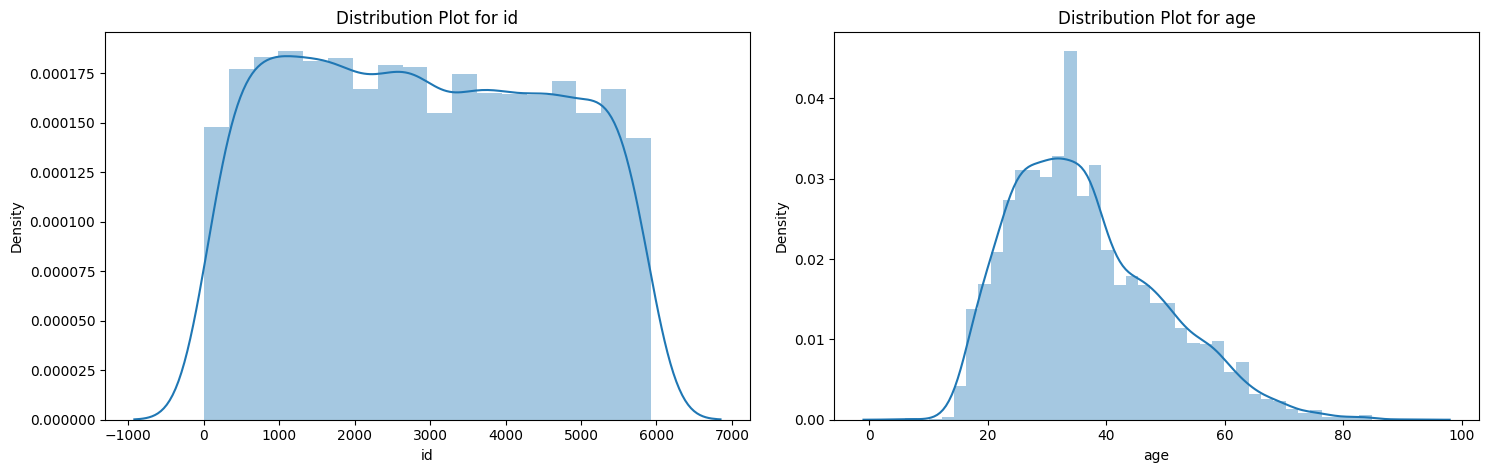

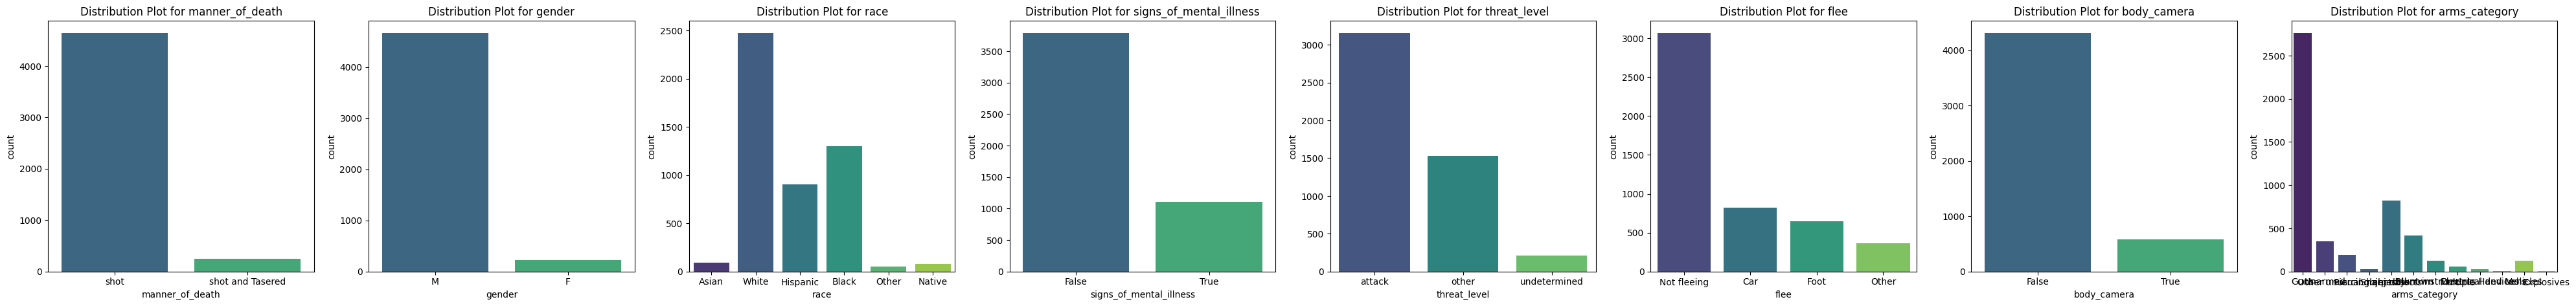

In [10]:
visualizer.plot_distribution(df,num_cols,cat_cols)

In [11]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [12]:
df.select_dtypes(include='datetime64').columns

Index([], dtype='object')

In [13]:
df.date.describe()

count           4895
unique          1792
top       2018-06-29
freq               9
Name: date, dtype: object

In [14]:
invalid_dates,valid_dates=data_quality.validate_date_range(df,['date'], '2018-06-29', '2018-10-24')
print(len(invalid_dates))
invalid_dates

4634


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [15]:
print(len(valid_dates))
valid_dates.head()

252


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
3272,3816,Daniel Norris,2018-07-01,shot,gun,33.0,M,White,Boise,ID,False,attack,Foot,False,Guns
3273,3817,Larry San Nicolas,2018-07-01,shot,sword,60.0,M,Asian,Grandview,MO,False,other,Not fleeing,False,Sharp objects
3274,3823,Joshua B. Reed,2018-07-01,shot,knife,26.0,M,White,Panora,IA,False,other,Not fleeing,False,Sharp objects
3275,3824,Frank Dripps,2018-07-03,shot,gun,52.0,M,White,South Elgin,IL,False,attack,Not fleeing,False,Guns
3276,3930,Lemuel Bunn,2018-07-03,shot,knife,40.0,M,Black,Fayetteville,NC,False,attack,Not fleeing,False,Sharp objects
